In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm
# import Perception as percept
import seaborn as sns
import pingouin as pg

### Functions 

In [19]:
# Function Definitions
# Curve fitting part
# define the true objective function ----------------------------------------------
def psyFunction(x,mu,sd,k,offset): #Sigmoid function
    yhat = norm.cdf(x,mu, sd) * k + offset
    return yhat
def Create2DList(rows,cols,initVal):
    answrs=[]
    for j in range(rows):
        column = []
        for i in range(cols):
            column.append(initVal)
        answrs.append(column)
    return answrs
def Average(lst):

    # Make sure no number 2s are included in the average
    if 2 in lst:
        lst.remove(2.0)

    avrg = 0.0
    try:
        avrg = np.round(sum(lst) / len(lst),3)
    except Exception as e:
#         print(e)
        avrg = np.nan

    return avrg
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]


In [20]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "D:/OneDrive/Documents/Projects/VisualProprioceptiveGithub/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/dyar/OneDrive - Facebook/Projects/VP_Analysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "/home/obi/Projects/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "C:/Users/PC/Documents/Projects/Github/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [4]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
    
    filez = "Answer" in files[i] 
        
    if filez:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2]) # ignore first 3 header line 
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
#         print(fNameS)
#         print(float(fNameS[6]))
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
            # print(e)
            replText = fNameS[6].replace("," , ".")
            # print(replText)
            propVal = float(replText)
        
        try:
            targPos = data.iloc[[0]["Name" == "Target_Position"]]
            stiPos = data.iloc[[1]["Name" == "Stimulus_Position"]]
            reHPos = data.iloc[[2]["Name" == "RealHand_Position"]]
            stzPos = data.iloc[[3]["Name" == "StartZone_Position"]]
            resPos = data.iloc[[4]["Name" == "Response"]]

            resP = resPos.tolist()

            if "Y" in resP[0]:
                responseVal = 1
            else:
                responseVal = 0

            # Convert values to list so that we can work with it 
            targP = targPos.tolist()
            stimP = stiPos.tolist()
            handP = reHPos.tolist()
            starP = stzPos.tolist()

            # Split each value into it's x,y and z axis 
            tp = targP[0].split(',')
            sp = stimP[0].split(',')
            rep = handP[0].split(',')
            szP = starP[0].split(',')

            # Only look at the z position of each object, because that is the only thing we changed 
            tpf =(float(tp[2]))
            spf = (float(sp[2]))
            rpf = (float(rep[2]))
            szf = (float(szP[2]))

            diffPos = np.absolute(tpf-spf)
            realVsVirtHand = np.absolute(rpf-spf)

    #         print(round(result,4))
    #         print(resP[0])

        #-------------------------------------------------
        # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
        # if the proprioceptive value is negative and the answer is yes, then that is correct 

            if propVal > 0.0 and 'Y' in resP[0]:
                correct = 0
            if propVal < 0.0 and 'Y' in resP[0]:
                correct = 1
            if propVal > 0.0 and 'N'in resP[0]:
                correct = 1
            if propVal < 0.0 and 'N' in resP[0]:
                correct = 0
            if propVal == 0.0:
                correct = 2

        #-------------------------------------------------

            rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resP[0],correct))
            tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])

            tmpValues.insert(0, "Trial", fNameS[7][0] , True)
            tmpValues.insert(0, "Participant_ID", fNameS[2] , True)

        except Exception as e:
            print('My err: ',e, " Participant_ID: ", fNameS[2])
            tpf = np.nan
            spf = np.nan
            rpf = np.nan
            szf = np.nan
            realVsVirtHand = np.nan
            propVal = np.nan
            diffPos = np.nan
            resP[0] = np.nan
            correct = np.nan
            
            rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resP[0],correct))
            tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])

            tmpValues.insert(0, "Trial", fNameS[7][0] , True)
            tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
            
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 

#----------------------------------------------------------------------------       

My err:  single positional indexer is out-of-bounds  Participant_ID:  fb5194925c


In [5]:
dataFrame.head(5)

,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer
0,379d850213,0,0.332,0.283,-0.110,-0.108,0.393,0.050,0.049,N,1.0
0,379d850213,1,0.532,0.443,-0.134,-0.108,0.577,0.000,0.089,Y,2.0
0,379d850213,2,0.332,0.236,-0.121,-0.108,0.357,-0.025,0.096,Y,1.0
0,379d850213,3,0.132,0.038,-0.081,-0.108,0.119,-0.050,0.094,Y,1.0
0,379d850213,4,0.132,0.094,-0.118,-0.108,0.212,0.025,0.038,N,1.0


In [6]:
print('Number of Participants: ', len(pd.unique(dataFrame['Participant_ID'])))

mask = (dataFrame['Participant_ID'] == '279f631720')
print('Number of trials: ', len(dataFrame[mask]['Trial']))
print('Number of Gains: ', len(pd.unique(dataFrame['ProprioceptiveVal'])))
print('Number of Targets: ', len(pd.unique(dataFrame['TargetPos'])))

# print(dataFrame.describe())

Number of Participants:  275
Number of trials:  30
Number of Gains:  8
Number of Targets:  5


In [9]:
dataFrame = dataFrame.reset_index()

<AxesSubplot:xlabel='Answer', ylabel='Count'>

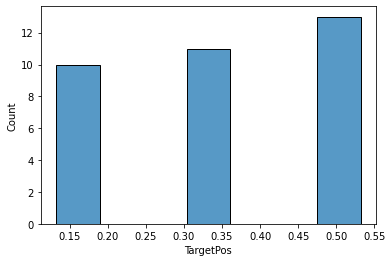

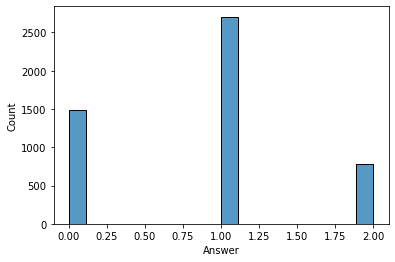

In [11]:
mask = (dataFrame['Participant_ID'] == pd.unique(dataFrame['Participant_ID'])[5]) 

plt.figure()
sns.histplot(x='TargetPos', data=dataFrame[mask ])

plt.figure()
sns.histplot(x='Answer', data=dataFrame)

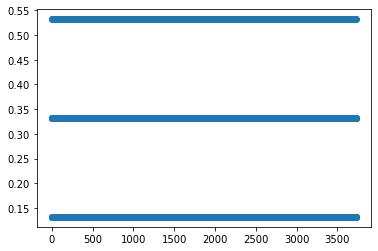

In [12]:
# Only consider three target position (Data seems to include the starting position as well)

tempTargetPos = dataFrame["TargetPos"].tolist()

targetPositions = []
i = 0
for item in tempTargetPos:
    if item > 0.005:
        targetPositions.append(item)
        i = i + 1
    
# targetPositions = [item>0.005 for item in tempTargetPos]
targetPositions

plt.plot(targetPositions,'o')
# plt.plot(dataFrame["StartZone"].tolist(),'ro')

# plt.plot(dataFrame["TargetPos"],'ro')

In [14]:
uniqueTargets = pd.unique(dataFrame["TargetPos"])

# print(uniqueTargets)

df_target_1 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[2]]
df_target_2 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[0]]
df_target_3 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[1]]


In [15]:
# Get proprioceptive values 
proprioceptiveVals = df_target_1['ProprioceptiveVal'].unique()
proprioceptiveVals.sort()
print(proprioceptiveVals)

# Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
propVals = df_target_1["ProprioceptiveVal"].tolist()
answers = df_target_1["Answer"].tolist()
probabilityAhead1 = []
for i in answers:
    if i == 1:
        probabilityAhead1.append(i)
print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))


m = len(proprioceptiveVals)
n = len(answers)
  
probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

for i in answers:
    if i == 1:
        if propVals[i] == proprioceptiveVals[0]: 
            probabilityAhead[0][i] = i
        if propVals[i] == proprioceptiveVals[1]: 
            probabilityAhead[1][i] = i
        if propVals[i] == proprioceptiveVals[2]: 
            probabilityAhead[2][i] = i
        if propVals[i] == proprioceptiveVals[3]: 
            probabilityAhead[3][i] = i
        if propVals[i] == proprioceptiveVals[4]: 
            probabilityAhead[4][i] = i
        if propVals[i] == proprioceptiveVals[5]: 
            probabilityAhead[5][i] = i
        if propVals[i] == proprioceptiveVals[6]: 
            probabilityAhead[6][i] = i
print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.571


TypeError: list indices must be integers or slices, not float

In [8]:
# dataFrame

In [21]:
# How many participants? 
participants = df_target_1['Participant_ID'].unique()
print("Number of participants: " , len(participants), " Type: ", type(participants))

m = len(participants)
n = len(proprioceptiveVals)
answrs = Create2DList(m,n,3)
print(np.shape(answrs))

userResponseL = np.arange(n)

# # Use a mask to sort through each participant and show their answers for each of the proprioceptive values
for part in range(len(participants)):
    for prop in range(len(proprioceptiveVals)):
        
        mask1 = (df_target_1['Participant_ID']==participants[part])&(df_target_1['ProprioceptiveVal']==proprioceptiveVals[prop])
        userRespose = df_target_1[mask1].Answer
        userResponseL = userRespose.tolist()
#         print(Average(userResponseL))
        if prop == 3:
            answrs[part][prop] = np.round(0.5 + random.uniform(-0.5, 0.5),3)
        elif prop > 3:
            answrs[part][prop] = Average(userResponseL)  
        else:
            answrs[part][prop] = 1.0 - Average(userResponseL) # Make sure to create sigmoid

# print(answrs)
# tempVals = []
resultDF = pd.DataFrame(answrs,columns=['P-0.1','P-0.05','P-0.025','P0.0','P0.025','P0.05','P0.1'])
resultDF.insert(0,'ParticipandID', participants, True)


Number of participants:  177  Type:  <class 'numpy.ndarray'>
(177, 7)


In [22]:
# print(resultDF)
# resultDF2 = resultDF[resultDF["P0.1"]==1.000]
# print(resultDF2)

# Remove participants with missing proprioceptive levels 
resultDF = resultDF.dropna()

# Remove participants who obviously have messed about (i.e. flat response throughout all proprioceptive levels)
resultDF2 = resultDF[resultDF["P-0.1"]==0.000]

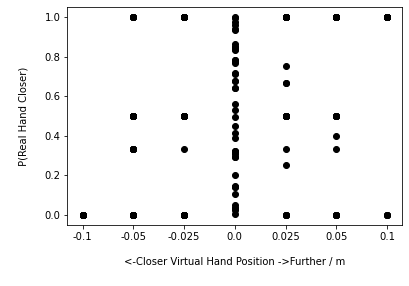

In [23]:
# print(resultDF2)
# lines = resultDF2.plot.line()

for index, row in resultDF2.iterrows():
    vals = (row['P-0.1'], row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])
    plt.plot(vals,'ko')

xVals = np.arange(len(proprioceptiveVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [12]:
# print(resultDF2['P-0.1'] + random.uniform(0.0, 0.05))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]


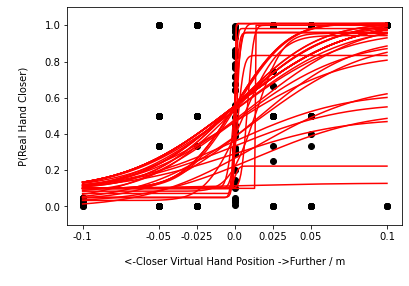

In [24]:
# Curve fitting part 
xVals = np.arange(len(proprioceptiveVals)) # This doesn't change
# xVals = np.pad(xVals, (1, 1), 'edge')
x = proprioceptiveVals
print(x)
yCurves = []
yVals = []
jnd = []
pseVal = []

for index, row in resultDF2.iterrows():

    vals = (row['P-0.1'] + random.uniform(0.0, 0.05), row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])

    # choose the input and output variables
    y = vals #+ random.uniform(0.0, 0.05)
#     y = np.pad(vals, (1, 1), 'edge')
    
    yVals.append(y)
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=10000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # plot input vs output
    plt.scatter(x, y,color=[0,0,0])

    # define a sequence of inputs between the smallest and largest known inputs
#     x_line = np.arange(min(x), max(x)+1, 0.1)
    x_line = np.arange(min(x), max(x)+0.001, 0.001)


    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = x_line[pidx]
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    jnd.append(jndVal)
    pseVal.append(pse)
#     print("JND: ", jndVal)
    
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '-', color='red')
    yCurves.append(y_line)
    
    
# # plt.legend(['Fitted Curve','Data Points']
plt.ylim([-0.1,1.1])
plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [25]:
jnd_13cm = [0.011,0.019,0.011,0.001,0.003,0.036,0.041,0.019,0.054,0.001,0.04,0.001,0.042,0.049,0.041,0.034,0.046,0.019,0.03,0.032,0.031,0.041,0.041,0.054,0.001,0.032,0.041,0.04,0.041,0.041,0.003,0.019,0.0,0.042,0.041,0.034,0.001,0.001,0.002]
jnd_33cm = [0.001, 0.0,0.029,0.019,0.002,0.054,0.002,0.063,0.041,0.019,0.019,0.041,0.002,0.031,0.002,0.021,0.035,0.085,0.041,0.041,0.015,0.0,0.031,0.042,0.009,0.041,0.001,0.041,0.037,0.001,0.041,0.019,0.002,0.001,0.03,0.041]
jnd_53cm = [0.021,0.032,0.02,0.008,0.049,0.002,0.073,0.031,0.049,0.04,0.081,0.018,0.001,0.02,0.071,0.041,0.031,0.041,0.031,0.02,0.043,0.037,0.041,0.041,0.003,0.019,0.013,0.041,0.032,0.001]

In [26]:
# Average JND Sensitivity to visual-proprioceptive errors
averageJND = np.round(np.mean(jnd),4)
medianJND = np.round(np.median(jnd),4)
stdErr = np.round(np.std(jnd, axis=0)/np.sqrt(len(jnd)),4)
minJND = np.round(np.min(jnd),4)
maxJND = np.round(np.max(jnd),4)

averagePSE = np.round(np.mean(pseVal),4)
stdErrPSE = np.round(np.std(pseVal, axis=0)/np.sqrt(len(pseVal)),4)
print("The average PSE bias in visual-proprioceptive error is: ", np.round(averagePSE*100,4), "SE:", np.round(stdErrPSE*100,4),"cm")

print("The average JND to visual-proprioceptive error is: ", np.round(averageJND*100,4), "SE:", np.round(stdErr*100,4),"cm")
print("The medial JND is: ", np.round(medianJND*100,4), "cm")
print("The min JND is: ", np.round(minJND*100,4), "cm and the max JND is: ", np.round(maxJND*100,4),"cm")

The average PSE bias in visual-proprioceptive error is:  0.73 SE: 0.51 cm
The average JND to visual-proprioceptive error is:  2.83 SE: 0.35 cm
The medial JND is:  3.4 cm
The min JND is:  0.0 cm and the max JND is:  11.4 cm


### Overall results for all three targets
The average PSE bias in visual-proprioceptive error is:  1.23 SE: 0.35 cm

The average JND to visual-proprioceptive error is:  2.95 SE: 0.46 cm

The medial JND is:  2.7 cm

The min JND is:  0.0 cm and the max JND is:  6.3 cm
        
### Overall results for the closest target at 13.2 cm away from the participant 
The average PSE bias in visual-proprioceptive error is:  1.63 SE: 0.85 cm

The average JND to visual-proprioceptive error is:  1.7 SE: 0.51 cm

The medial JND is:  0.9 cm

The min JND is:  0.0 cm and the max JND is:  4.9 cm


### Overall results for medium distance targets targets at 33.2 cm away from the participant
The average PSE bias in visual-proprioceptive error is:  1.34 SE: 0.72 cm

The average JND to visual-proprioceptive error is:  2.38 SE: 0.67 cm

The medial JND is:  1.9 cm

The min JND is:  0.1 cm and the max JND is:  6.3 cm

### Overall results for the furthest targets at 53.2 cm away from the participant
The average PSE bias in visual-proprioceptive error is:  2.4 SE: 0.7 cm

The average JND to visual-proprioceptive error is:  3.69 SE: 0.8 cm

The medial JND is:  2.0 cm

The min JND is:  0.2 cm and the max JND is:  8.0 cm




In [28]:
# print(jnds)
# print(ses)

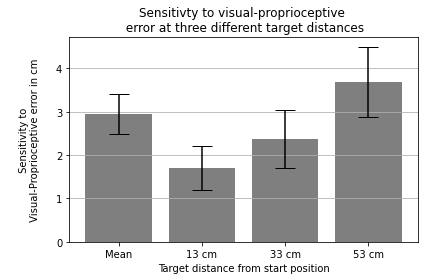

In [29]:
jnds = [2.95,1.7,2.38,3.69]
ses = [0.46,0.51,0.67,0.8]
x_pos = [1,2,3,4]
axisLabels = ['Mean','13 cm','33 cm','53 cm']

# plt.bar([1,2,3,4],jnds)
# plt.errorbar([1,2,3,4], ses)

fig, ax = plt.subplots()
ax.bar(x_pos, jnds, yerr=ses, align='center', alpha=0.5, ecolor='black', capsize=10, color=['black'])

ax.set_ylabel("\n Sensitivity to \n Visual-Proprioceptive error in cm \n")
ax.set_xticks(x_pos)
ax.set_xticklabels(axisLabels)
ax.set_title('Sensitivty to visual-proprioceptive \n error at three different target distances')
ax.yaxis.grid(True)

ax.set_xlabel("Target distance from start position")

# Save the figure and show
plt.tight_layout()
plt.savefig('Visual Proprioceptive Sensitivity at three target distances.png')
plt.show()


In [30]:
from scipy.stats import f_oneway
from scipy import stats

# print(len(df_target_1["TargetPos"]), len(df_target_2["TargetPos"]), len(df_target_3["TargetPos"][0:350]))

# df_target_1["TargetPos"].values

# f_oneway(jnd_13cm,jnd_33cm,jnd_53cm)

# stats.kruskal(jnd_13cm,jnd_33cm,jnd_53cm)

stats.ttest_ind(jnd_13cm,jnd_53cm, equal_var = True)



Ttest_indResult(statistic=-1.1048348278926228, pvalue=0.2731830445131793)

In [31]:
popt

array([1.03857430e-19, 4.77249191e-02, 9.10000000e-01, 1.00000000e-01])

(43, 201)


AttributeError: 'LineCollection' object has no property 'markerfacecoloralt'

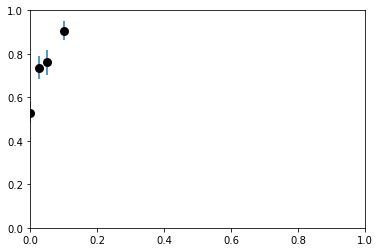

In [32]:
#----------------------------------------
#----------- # Average curve ------------
#----------------------------------------
curveArrShape = np.shape(yCurves)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals, axis=0)  
yValsSE = np.round(np.std(yVals, axis=0)/np.sqrt(len(yVals)),4)
plt.errorbar(x, yValsMean, yValsSE,marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurves, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurves, axis=0)
plt.plot(x_line, ydata)
plt.fill_between(x_line, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('Psych Curve for 13 cm Target.png')

plt.show()



In [22]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
print(df)

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

   c1   c2
0  10  100
1  11  110
2  12  120
10 100
11 110
12 120


In [23]:
# This computes how many times the answer was correct (1) and incorrect (0) for each of the proprioceptive values accross all participants
group1 = df_target_1.groupby('ProprioceptiveVal')
df2 = group1
p1.apply(lambda x: x['Answer'].value_counts())
df2

NameError: name 'p1' is not defined

In [24]:
df2l = df2.tolist()

df2ll=np.arange(14)
i = 0
c = 0
for idx,val in enumerate(df2l):
#     if idx % 2 == 0 and idx != 0:
#         continue
    if i == 2:
        i = 0
        continue
    
#     print(idx, ' ', val)
    df2ll[c] = val
    c+=1
    
    i+=1
    
# Get rid of 3rd element of each df2l value 
print("Array: " , (df2ll))
print("Total length: " , len(df2ll))

rows = int(len(df2ll)/2)
print("Rows: ", rows)
columns = 2
df2arr = np.reshape(df2ll,(rows,columns))

propVals = []
for i in range(len(df2arr)):
    lenArr = sum(df2arr[i])
#     print(df2arr[i][0] / lenArr)
    probV = np.round(df2arr[i][0] / lenArr,3)
    if i<3:
        propVals.append(probV)
    else:
        propVals.append(1.0-probV)


print("Probabilty Values: ", propVals)
plt.plot(propVals,'ko')
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")

AttributeError: 'DataFrameGroupBy' object has no attribute 'tolist'

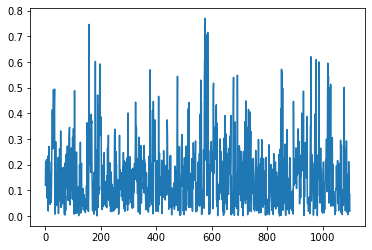

In [25]:
# Plot difference betweeen the real and virtual hand throughout the task 
r2vDiff = []
for i, row in df_target_1.iterrows():
    r2vDiff.append(row['Real2VirtHandDiff']) 
plt.plot(r2vDiff)

In [26]:
# Curve fitting part 

# choose the input and output variables
x = xVals
y = propVals

# curve fit
# popt, _ = curve_fit(objectiveSig, x, y)
popt, _ = curve_fit(func5, x, y)

# summarize the parameter values
# a, b, c, d, e, f = popt
a, b, c, d, e, f = popt

# plot input vs output
plt.scatter(x, y,color=[0,0,0])

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
# y_line = objective(x_line, a, b, c, d, e, f)
# y_line = objectiveSig(x_line, a, b)
y_line = func5(x_line, a, b, c, d, e, f)



# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
plt.legend(['Fitted Curve','Data Points'])
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")
plt.show()


NameError: name 'func5' is not defined

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import scipy as sy
import matplotlib.pyplot as plt

d = np.array([75, 80, 90, 95, 100, 105, 110, 115, 120, 125], dtype=float)
p2 = np.array([6, 13, 25, 29, 29, 29, 30, 29, 30, 30], dtype=float) / 30. # scale to 0..1

# psychometric function
def pf(x, alpha, beta):
    return 1. / (1 + np.exp( -(x-alpha)/beta ))

# fitting
par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]
par, mcov = curve_fit(pf, d, p2, par0)
print(par)
plt.plot(d, p2, 'ro')
plt.plot(d, pf(d, par[0], par[1]))
plt.show()